In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
train_df = pd.read_csv(r"DataSets/train.csv")
test_df = pd.read_csv(r"DataSets/test.csv")

In [16]:
y = train_df['label']
X = train_df.drop('label', axis=1)

In [17]:
X = X.values.reshape(-1, 28, 28, 1) / 255.0
test_data = test_df.values.reshape(-1, 28, 28, 1) / 255.0

In [18]:
y = to_categorical(y, 10)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\elhad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,             
    restore_best_weights=True 
)
checkpoint = ModelCheckpoint(
    filepath='best_mnist_model.h5',  
    monitor='val_accuracy',         
    save_best_only=True,
    verbose=1
)
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint]
)


Epoch 1/30
518/525 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9825 - loss: 0.0576
Epoch 1: val_accuracy improved from -inf to 0.98857, saving model to best_mnist_model.h5


525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9825 - loss: 0.0575 - val_accuracy: 0.9886 - val_loss: 0.0391
Epoch 2/30
521/525 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9868 - loss: 0.0416
Epoch 2: val_accuracy improved from 0.98857 to 0.99036, saving model to best_mnist_model.h5


525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9868 - loss: 0.0417 - val_accuracy: 0.9904 - val_loss: 0.0324
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9885 - loss: 0.0377
Epoch 3: val_accuracy did not improve from 0.99036
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9885 - loss: 0.0377 - val_accuracy: 0.9899 - val_loss: 0.0309
Epoch 4/30
523/525 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9896 - loss: 0.0317
Epoch 4: val_accuracy did not improve from 0.99036
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9896 - loss: 0.0317 - val_accuracy: 0.9893 - val_loss: 0.0339
Epoch 5/30
520/525 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9903 - loss: 0.0326
Epoch 5: val_accuracy improved from 0.99036 to 0.99060, saving model to best_mnist_model.h5


525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9904 - loss: 0.0326 - val_accuracy: 0.9906 - val_loss: 0.0318
Epoch 6/30
524/525 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9916 - loss: 0.0239
Epoch 6: val_accuracy improved from 0.99060 to 0.99131, saving model to best_mnist_model.h5


525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9916 - loss: 0.0239 - val_accuracy: 0.9913 - val_loss: 0.0299
Epoch 7/30
520/525 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9933 - loss: 0.0209
Epoch 7: val_accuracy did not improve from 0.99131
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9908 - val_loss: 0.0314
Epoch 8/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9932 - loss: 0.0218
Epoch 8: val_accuracy did not improve from 0.99131
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9908 - val_loss: 0.0302
Epoch 9/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9934 - loss: 0.0200
Epoch 9: val_accuracy did not improve from 0.99131
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9911 - val_loss: 0.0308


In [23]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.0371
Validation Accuracy: 0.9913


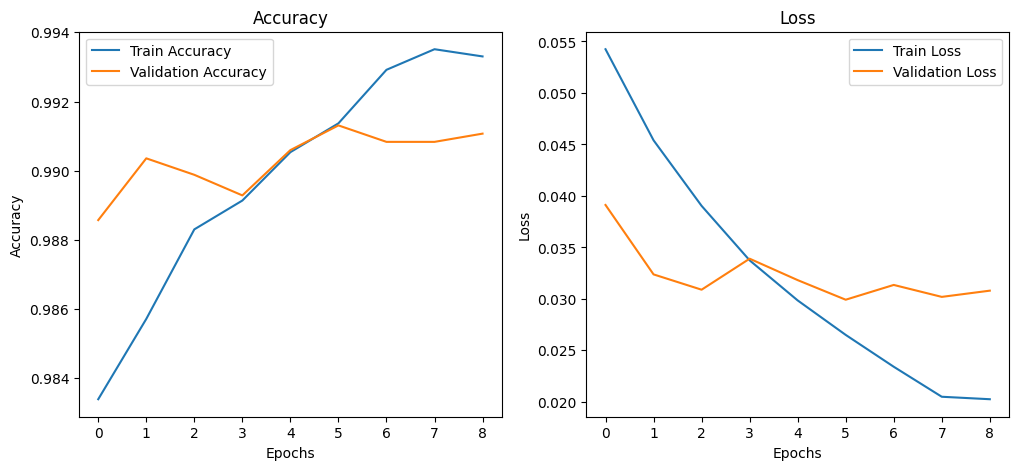

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


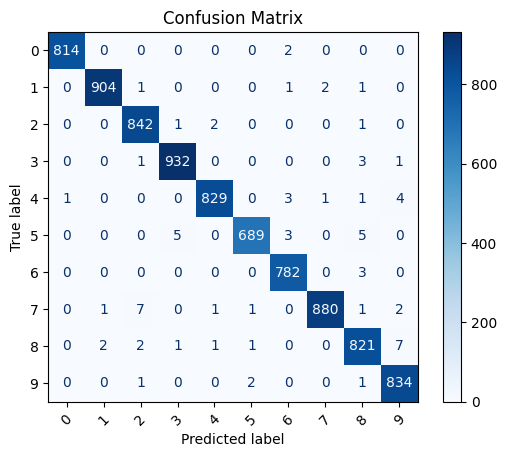

In [31]:
# 9. Confusion Matrix
y_val_labels = np.argmax(y_val, axis=1)
y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


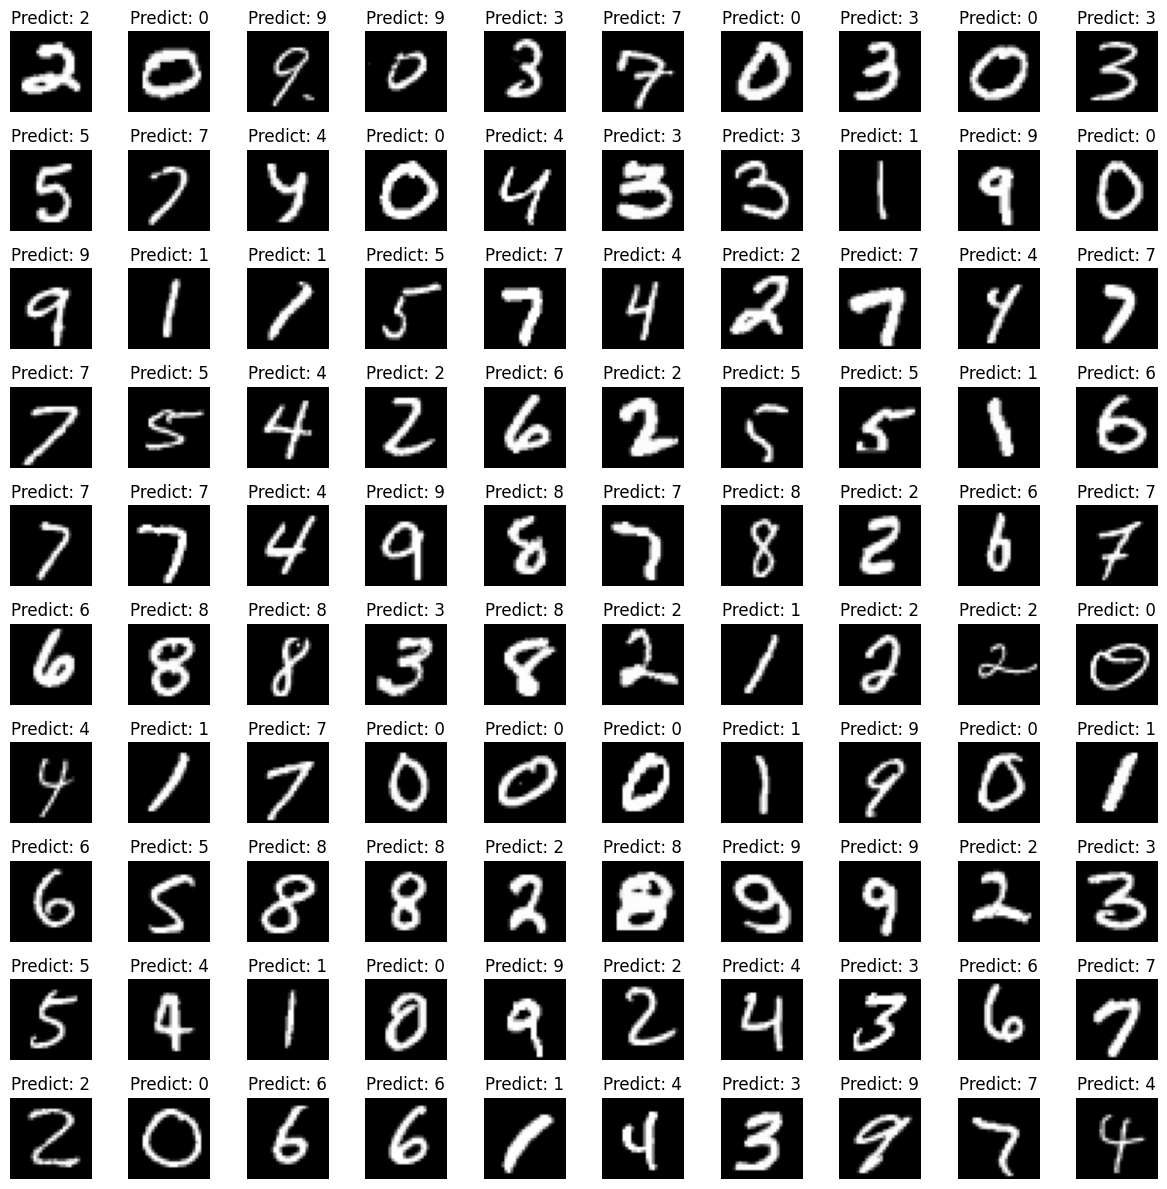

In [ ]:
best_model = load_model(r'Models/best_mnist_model.h5')
num_images = 100

samples = test_df.iloc[:num_images].values.reshape(-1, 28, 28, 1) / 255.0

predictions = np.argmax(best_model.predict(samples), axis=1)

rows = cols = int(np.ceil(np.sqrt(num_images)))  
plt.figure(figsize=(12, 12))


for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(samples[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predict: {predictions[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
model.save(r'Models/final_mnist_model.h5')